In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("../../output/current_values.csv", index_col=0)


hf = pd.read_csv("../../output/Codes/2digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")
cf = pd.read_csv("../../output/Codes/1digit_occupations.csv", index_col=0)
cf = cf.set_index("codes")


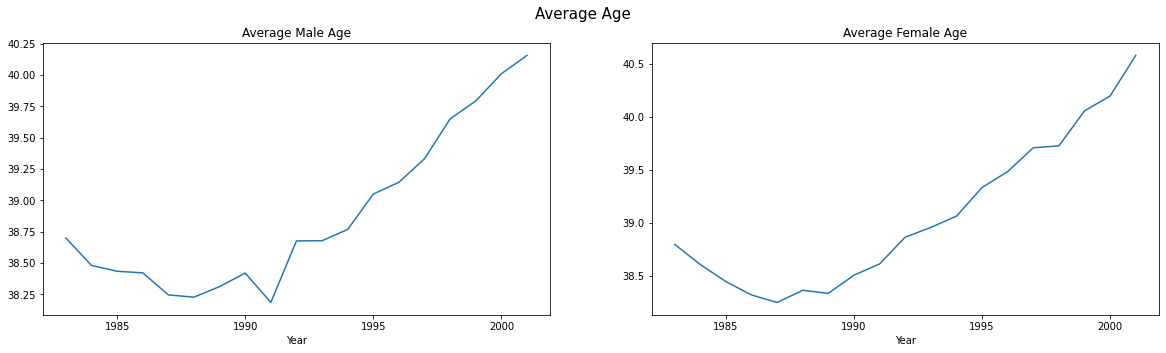


These graphs are very similar in shape where in 1980s, the average age decreases, signaling that a new generation had entered the workforce. However, it is also notable that the average only fluctuates by 3 years throughout the entire graph, showing that the average age will stay pretty much the same as new generations enter the workforce.

One thing we can deduce from this graph is that the reason women increased their salery more than men was not a 
result of a more women entering the work force than in the past. If a greater number of women had entered the worfoce 
in the 1980s than in the past, the average age of women would shoot down as the younger women would outweigh the
older. But looking at the graph, this did not happen. Indeed, the average age of women completely mirrors that of 
men. Since there is not a deep decrease in average age for women, we know that the reason that women started 
getting higher saleries must be a product of women going into more lucrative fields.



In [2]:
df = df[(df["Female"]!=0) | (df["Male"]!=0)]

grouped = df.groupby(["Female","Year"])
arrays = []

for x in df.sort_values(by="Female")["Female"].unique():
    for y in df.sort_values(by="Year")["Year"].unique():
        arrays.append(grouped.get_group((x,y))[["Female","Year", "Asecwt", "Age"]].to_numpy())
plt.figure(figsize=[20,5])

years = []
averages = []
digit = 0
for array in arrays:
    values = array[:,-1]
    weights = array[:,2]
    year = array[0,1]
    female = array[0,0]
    average = np.average(values,weights=weights)
    if female != digit:
        plt.subplot(1,2,1)
        plt.plot(years,averages)
        plt.xticks(np.arange(1985, max(years)+1, 5.0))
        plt.xlabel("Year")
        plt.title("Average Male Age")
        digit = female
        years=[]
        averages=[]
    years.append(year)
    averages.append(average)
plt.subplot(1,2,2)
plt.plot(years,averages)
plt.xticks(np.arange(1985, max(years), 5.0))
plt.xlabel("Year")
string = "Average Age"
plt.suptitle(string,fontsize=15)
plt.title("Average Female Age")
plt.show()
print("""
These graphs are very similar in shape where in 1980s, the average age decreases, signaling that a new generation had entered the workforce. However, it is also notable that the average only fluctuates by 3 years throughout the entire graph, showing that the average age will stay pretty much the same as new generations enter the workforce.

One thing we can deduce from this graph is that the reason women increased their salery more than men was not a 
result of a more women entering the work force than in the past. If a greater number of women had entered the worfoce 
in the 1980s than in the past, the average age of women would shoot down as the younger women would outweigh the
older. But looking at the graph, this did not happen. Indeed, the average age of women completely mirrors that of 
men. Since there is not a deep decrease in average age for women, we know that the reason that women started 
getting higher saleries must be a product of women going into more lucrative fields.


""")
